In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
df = df_.copy()

In [4]:
df.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [5]:
df.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [6]:
df.duplicated().sum()

0

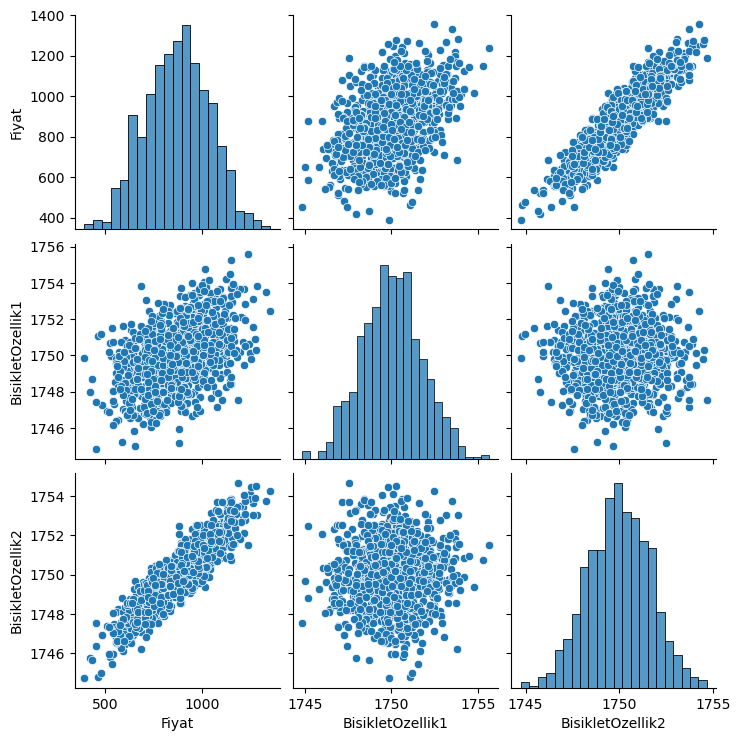

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#train_test_split

In [10]:
df.columns

Index(['Fiyat', 'BisikletOzellik1', 'BisikletOzellik2'], dtype='object')

In [11]:
y = df["Fiyat"].values # y -> label bizim gitmek istediğimiz özellik

In [12]:
x = df[["BisikletOzellik1","BisikletOzellik2"]].values # x -> features özellikler

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=83) 

In [14]:
x_train.shape

(670, 2)

In [15]:
x_test.shape

(330, 2)

In [16]:
y_train.shape

(670,)

In [17]:
y_test.shape

(330,)

In [18]:
#scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(x_train)

MinMaxScaler()

In [22]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
x_train

array([[0.57353069, 0.5630176 ],
       [0.68065498, 0.84245382],
       [0.46746327, 0.77776249],
       ...,
       [0.18849626, 0.47604223],
       [0.54626162, 0.20003529],
       [0.40118017, 0.50659873]])

In [24]:
import tensorflow as tf

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))

model.add(Dense(1))
    
model.compile(optimizer = "rmsprop", loss="mse")

In [27]:
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 781915.1875
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 781960.1250
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 791166.8750
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 786109.3125
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 791793.0625
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 791561.2500
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 794945.0000
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 791729.1250
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 758414.3750
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 776751.6875
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 797757.3750
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 795339.0625
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 781058.8125
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 352u

In [28]:
loss = model.history.history["loss"]

<Axes: >

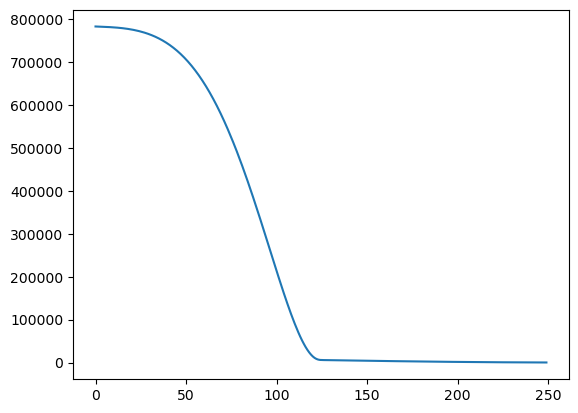

In [29]:
sns.lineplot(x = range(len(loss)), y = loss)

In [30]:
trainLoss = model.evaluate(x_train, y_train, verbose=0)

In [31]:
testLoss = model.evaluate(x_test, y_test, verbose=0)

In [32]:
trainLoss

206.96380615234375

In [33]:
testLoss

190.2259979248047

In [34]:
testTahminleri = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [41]:
testTahminleri.shape

(330, 1)

In [39]:
tahminDf = pd.DataFrame(y_test, columns=["gerçek_Y"])

In [42]:
tahminDf["Tahmin_y"] = pd.Series(testTahminleri.reshape(330, ))

In [43]:
tahminDf

,gerçek_Y,Tahmin_y
0,960.659897,953.040222
1,1067.014716,1043.657349
2,979.472356,983.207703
3,784.752176,811.801697
4,960.075131,948.201721
...,...,...
325,932.096430,926.381042
326,1125.487881,1113.827881
327,775.944812,786.069275
328,1136.520119,1106.244263


<Axes: xlabel='gerçek_Y', ylabel='Tahmin_y'>

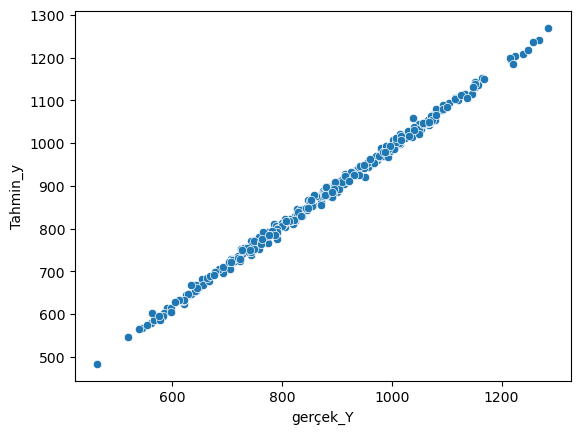

In [44]:
sns.scatterplot(x="gerçek_Y", y="Tahmin_y", data= tahminDf)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mean_absolute_error(tahminDf["gerçek_Y"], tahminDf["Tahmin_y"])

11.441693015190578

In [48]:
mean_squared_error(tahminDf["gerçek_Y"], tahminDf["Tahmin_y"])

190.22596209616628

In [49]:
df.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [54]:
yeniBisikletOzellik = [[1700, 1780]]

In [55]:
yeniBisikletOzellik = scaler.transform(yeniBisikletOzellik)

In [56]:
model.predict(yeniBisikletOzellik)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[1508.4781]], dtype=float32)

In [65]:
from tensorflow.keras.models import load_model
from keras.losses import MeanSquaredError

In [63]:
model.save("bisiklet_modeli.h5")

In [67]:
model = load_model("bisiklet_modeli.h5", custom_objects={"mse": MeanSquaredError()})

In [68]:
model.predict(yeniBisikletOzellik)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1508.4781]], dtype=float32)